In [62]:
!pip install streamlit
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [40]:
#assumptions
import numpy as np
invested = 1000000
weights = np.array([.25, .3, .15, .3])

In [41]:
#data
import pandas as pd
ton = pd.read_csv("./data/Toncoin_01.05.2022-01.05.2024_historical_data_coinmarketcap.csv", sep = ';')
bnb = pd.read_csv("./data/BNB_01.05.2022-01.05.2024_historical_data_coinmarketcap.csv", sep = ';')
eth = pd.read_csv("./data/Ethereum_01.05.2022-01.05.2024_historical_data_coinmarketcap.csv", sep = ';')
sol = pd.read_csv("./data/Solana_01.05.2022-01.05.2024_historical_data_coinmarketcap.csv", sep = ';')
def transformer_returns(df):
    df = df[['timestamp', 'close']]
    df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
    df = df.sort_values(by = 'timestamp', ascending = True)
    df = df.set_index('timestamp')
    df['return']=df['close'].pct_change()
    df = df.dropna()
    df = df.drop('close', axis = 1)
    return df
def transformer_prices(df):
    df = df[['timestamp', 'close']]
    df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
    df = df.sort_values(by = 'timestamp', ascending = True)
    df = df.set_index('timestamp')
    return df
ton_tr= transformer_returns(ton)
bnb_tr= transformer_returns(bnb)
eth_tr= transformer_returns(eth)
sol_tr= transformer_returns(sol)
data=pd.concat([ton_tr, bnb_tr, eth_tr, sol_tr], axis = 1)
data.columns = ['ton', 'bnb', 'eth', 'sol']

ton_tr= transformer_prices(ton)
bnb_tr= transformer_prices(bnb)
eth_tr= transformer_prices(eth)
sol_tr= transformer_prices(sol)
prices=pd.concat([ton_tr, bnb_tr, eth_tr, sol_tr], axis = 1)
prices.columns = ['ton', 'bnb', 'eth', 'sol']

data.tail()

/var/folders/gq/rc0f78f54rvc4nwv2hld8swh0000gn/T/ipykernel_2396/1295737804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
/var/folders/gq/rc0f78f54rvc4nwv2hld8swh0000gn/T/ipykernel_2396/1295737804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
/var/folders/gq/rc0f78f54rvc4nwv2hld8swh0000gn/T/ipykernel_2396/1295737804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

,ton,bnb,eth,sol
timestamp,,,,
2024-04-27,0.014541,-0.003321,0.038977,0.015706
2024-04-28,0.004357,0.007303,0.003261,-0.024296
2024-04-29,-0.021174,-0.012065,-0.014511,-0.000579
2024-04-30,-0.028263,-0.024194,-0.063177,-0.078489
2024-05-01,-0.052784,-0.029525,-0.014110,0.060374


In [42]:
data.corr()

,ton,bnb,eth,sol
ton,1.000000,0.338315,0.389957,0.311716
bnb,0.338315,1.000000,0.541448,0.441233
eth,0.389957,0.541448,1.000000,0.584540
sol,0.311716,0.441233,0.584540,1.000000


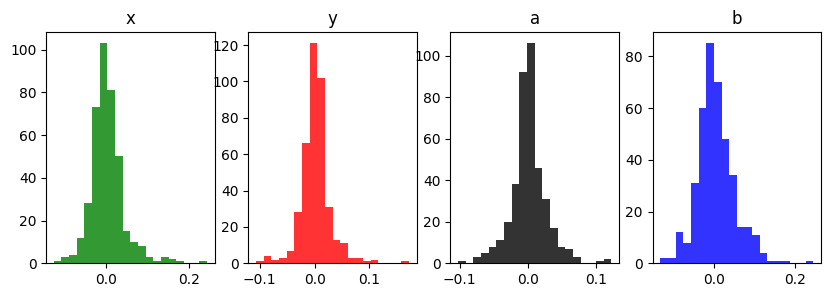

In [43]:
#normal distibution of returns
x, y, a, b = data.ton.values, data.bnb.values, data.eth.values, data.sol.values
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,3))
fig.add_subplot(1,4,1)
plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
plt.title('x')
fig.add_subplot(1,4,2)
plt.hist(y,bins=20,color='red',alpha=0.8,align='mid')
plt.title('y')
fig.add_subplot(1,4,3)
plt.hist(a,bins=20,color='black',alpha=0.8,align='mid')
plt.title('a')
fig.add_subplot(1,4,4)
plt.hist(b,bins=20,color='blue',alpha=0.8,align='mid')
plt.title('b')
plt.show()

#### Value At Risk

In [44]:
data['portfolio'] = data.dot(weights)
data = data.sort_values(by = 'portfolio')
data

,ton,bnb,eth,sol,portfolio
timestamp,,,,,
2023-06-10,-0.125142,-0.082952,-0.047734,-0.099173,-0.093083
2024-04-13,-0.105781,-0.070560,-0.073430,-0.093037,-0.086539
2024-03-19,-0.008619,-0.085619,-0.102436,-0.132538,-0.082967
2023-06-05,-0.051199,-0.092633,-0.041621,-0.079927,-0.070811
2024-04-12,-0.082703,-0.014075,-0.074806,-0.109754,-0.069045
...,...,...,...,...,...
2023-11-15,0.058093,0.047435,0.041108,0.152996,0.080818
2023-07-13,0.028376,0.051102,0.071789,0.184192,0.088450
2024-02-28,0.163956,0.052598,0.043515,0.089162,0.090044


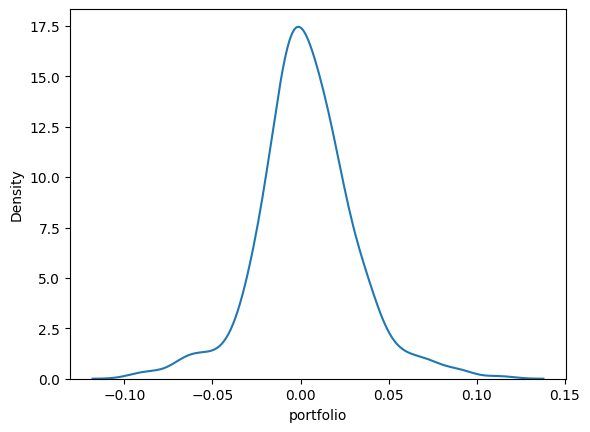

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(data['portfolio'])
#plt.axvline(-0.05, c = 'r')
plt.show()

In [46]:
q5 = data['portfolio'].quantile(q=0.05)
q95 = data['portfolio'].quantile(q=0.95)
r = data['portfolio'].mean()
sig = data['portfolio'].std()

In [47]:
q5 * invested

-38133.16309727745

In [48]:
data['invested'] = data['portfolio']*invested + invested
q5 = data['invested'].quantile(q=0.05)
q95 = data['invested'].quantile(q=0.95)
r = data['invested'].mean()
sig = data['invested'].mean()
q5

961866.8369027226

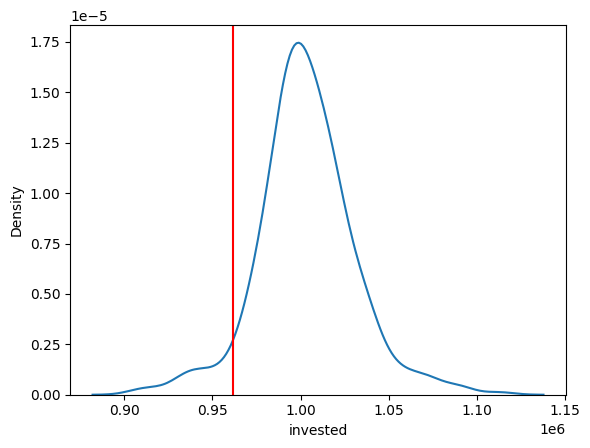

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(data['invested'])
plt.axvline(q5, c = 'r')
plt.show()

In [50]:
from scipy.stats import norm
conf_level = 0.05
mean_investment = data['invested'].mean()
stddev_investment = data['invested'].std()
cutoff = norm.ppf(conf_level, mean_investment, stddev_investment)
q5

961866.8369027226

In [51]:
VaR = invested - cutoff
VaR

42001.65372734587

In [52]:
n_days = 15
var_array=[]
for x in range(1, n_days+1):
    var_n = VaR * np.sqrt(x) # var1*sqrt(n)
    var_array.append(var_n)
var_array

[42001.65372734587,
 59399.308343310986,
 72748.99825767775,
 84003.30745469173,
 93918.55290175279,
 102882.61998506454,
 111125.93041600627,
 118798.61668662197,
 126004.9611820376,
 132820.89127211377,
 139303.72598803858,
 145497.9965153555,
 151439.1161682287,
 157155.7979256449,
 162671.70539918123]

Различия в q5 за счет того - сначала q5 исходного распределения returns, затем q5 при допущении что returns распределен нормально.

#### Expected Shortfall

In [53]:
cutoff = np.mean(data[data['invested'] <= cutoff]['invested'])
es1 = invested - cutoff
es1

61935.62174739025

In [54]:
#n-day VaR
n_days = 15
es_array = []
for x in range(1, n_days+1):
    es_n = es1 * np.sqrt(x)
    es_array.append(es_n)
es_array

[61935.62174739025,
 87590.1962691693,
 107275.6436648478,
 123871.2434947805,
 138492.26045587892,
 151710.67018313115,
 163866.25243975833,
 175180.3925383386,
 185806.86524217075,
 195857.63302041104,
 205417.21849346953,
 214551.2873296956,
 223312.0599879581,
 231741.8766155595,
 239875.63156464437]

In [55]:
#max_drawdown
ton_tr= transformer_returns(ton)
bnb_tr= transformer_returns(bnb)
eth_tr= transformer_returns(eth)
sol_tr= transformer_returns(sol)
data=pd.concat([ton_tr, bnb_tr, eth_tr, sol_tr], axis = 1)
data.columns = ['ton', 'bnb', 'eth', 'sol']
data['portfolio'] = data.dot(weights)

/var/folders/gq/rc0f78f54rvc4nwv2hld8swh0000gn/T/ipykernel_2396/1295737804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
/var/folders/gq/rc0f78f54rvc4nwv2hld8swh0000gn/T/ipykernel_2396/1295737804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
/var/folders/gq/rc0f78f54rvc4nwv2hld8swh0000gn/T/ipykernel_2396/1295737804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [56]:
#max drawdown
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

max_drawdowns = data.apply(max_drawdown, axis = 0)
max_drawdowns

#https://www.codearmo.com/blog/sharpe-sortino-and-calmar-ratios-python

ton         -0.497595
bnb         -0.410634
eth         -0.273770
sol         -0.428806
portfolio   -0.358394
dtype: float64

In [57]:
#drawdown
ton_tr= transformer_prices(ton)
bnb_tr= transformer_prices(bnb)
eth_tr= transformer_prices(eth)
sol_tr= transformer_prices(sol)
prices =pd.concat([ton_tr, bnb_tr, eth_tr, sol_tr], axis = 1)
prices.columns = ['ton', 'bnb', 'eth', 'sol']
prices['portfolio'] = prices.dot(weights)

def max_drawdown_ctm(prices):
    dd_cont={}
    for col in prices.columns:
        peak = prices[col].max()
        trough= prices[prices[prices[col] == prices[col].max()].index.values[0]:][col].min()
        dd = (trough-peak)/peak
        dd = round(dd,4)
        dd_cont[col] = dd
    return pd.Series(dd_cont)

dd_s = max_drawdown_ctm(prices)
dd_s


/var/folders/gq/rc0f78f54rvc4nwv2hld8swh0000gn/T/ipykernel_2396/1295737804.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
/var/folders/gq/rc0f78f54rvc4nwv2hld8swh0000gn/T/ipykernel_2396/1295737804.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
/var/folders/gq/rc0f78f54rvc4nwv2hld8swh0000gn/T/ipykernel_2396/1295737804.py:18: SettingWithCopyWarning: 
A value is trying to be set on a 

ton         -0.3263
bnb         -0.1987
eth         -0.2697
sol         -0.3742
portfolio   -0.2276
dtype: float64

In [58]:
#sharp ratio
#data['portfolio'] = data.dot(weights)

def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean/sigma

N = 255
rf = 0.01

sharpes = data.apply(sharpe_ratio, args=(N, rf), axis = 0)
sharpes

ton          1.126100
bnb          1.048721
eth          0.952091
sol          1.941327
portfolio    1.850924
dtype: float64

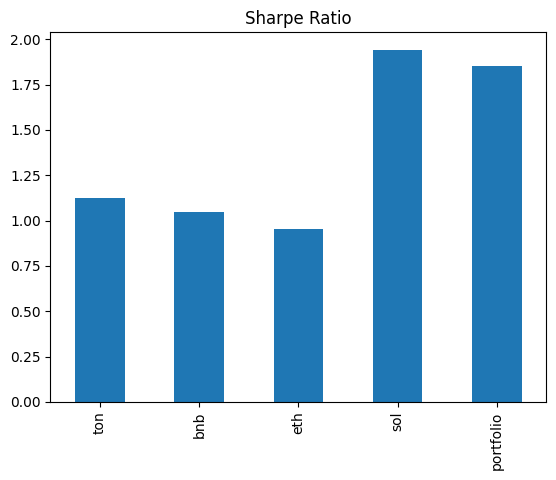

In [59]:
sharpes.plot.bar()
plt.title('Sharpe Ratio')
plt.show()

### Web Application

In [60]:
!streamlit run ss.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.40:8501

/Users/cotangentofzero/projects/funcs.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
/Users/cotangentofzero/projects/funcs.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date
/Users/cotangentofzero/projects/funcs.py:5: SettingWithCopyWarning: 
A value is try